## Statistical analysis for crime data

### Navigation
* [README](https://github.com/Kaori61/crime-data-analysis/blob/main/README.md)
* [Clean data](https://github.com/Kaori61/crime-data-analysis/blob/main/dataset/cleaned_data.csv)
* [Raw data](https://github.com/Kaori61/crime-data-analysis/blob/main/dataset/raw_data.csv)
* [ETL pipleline](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/etl_pipeline.ipynb)
* [Exploratory data analysis](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/exploratory_data_analysis.ipynb)

##### Import libralies and load dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../dataset/data_cleaned.csv')
df.head()

,Date,Borough,Crime Section,Crime group,Outcome,Positive Outcome,Outcome Count,Year,Month,Weekday
0,2023-01-01,Barnet,PUBLIC ORDER OFFENCES,PUBLIC FEAR ALARM OR DISTRESS,Evidential Difficulties Victim Based-Named Sus...,N,1,2023,1,Sunday
1,2023-01-01,Barnet,ROBBERY,ROBBERY OF BUSINESS PROPERTY,Investigation Complete; No Suspect Identified....,N,1,2023,1,Sunday
2,2023-01-01,Barnet,THEFT,SHOPLIFTING,Evidential Difficulties Victim Based-Named Sus...,N,4,2023,1,Sunday
3,2023-01-01,Barnet,VIOLENCE AGAINST THE PERSON,VIOLENCE WITHOUT INJURY,Evidential Difficulties Victim Based-Named Sus...,N,1,2023,1,Sunday
4,2023-01-01,Barnet,VIOLENCE AGAINST THE PERSON,VIOLENCE WITHOUT INJURY,Investigation Complete; No Suspect Identified....,N,1,2023,1,Sunday


#### Mean crime count per borough

In [3]:
df['Borough'].value_counts().mean()

np.float64(12537.46875)

The mean is the sum of all values divided by the number of values and it is the average. The average number of crime in borough is 12347

#### Median crime count per borough

In [4]:
df['Crime Section'].value_counts().median()

np.float64(24078.0)

The Median is the middle value in a dataset. 

#### Standard Deviation

In [5]:
df['Outcome Count'].std()

np.float64(3.7784382346816754)

Standard deviation measures how spread out the data is. A high standard deviation means more variability.
This data has standard deviation of 3.37 which is moderately spread out. 

#### Hypothesis Testing
Hypothesis testing helps assess if differences or relationships are statistically significant, not just due to chance.

First, install scripy

In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from scipy.stats import ttest_ind
import itertools

# Map 'Y'/'N' to 1/0
df['Closed'] = df['Positive Outcome'].map({'Y': 1, 'N': 0})

# Get top 10 boroughs by crime count
top_boroughs = df['Borough'].value_counts().nlargest(10).index

# Filter dataframe to include only those boroughs
filtered_df = df[df['Borough'].isin(top_boroughs)]

# Loop through all unique borough pairs
for b1, b2 in itertools.combinations(top_boroughs, 2):
    group1 = filtered_df[filtered_df['Borough'] == b1]['Closed']
    group2 = filtered_df[filtered_df['Borough'] == b2]['Closed']
    
    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    
    print(f"{b1} vs {b2} -> t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

Westminster vs Camden -> t-statistic: 17.62, p-value: 0.0000
Westminster vs Newham -> t-statistic: 11.39, p-value: 0.0000
Westminster vs Tower Hamlets -> t-statistic: 17.25, p-value: 0.0000
Westminster vs Lambeth -> t-statistic: 16.05, p-value: 0.0000
Westminster vs Southwark -> t-statistic: 18.49, p-value: 0.0000
Westminster vs Brent -> t-statistic: 17.22, p-value: 0.0000
Westminster vs Hackney -> t-statistic: 18.83, p-value: 0.0000
Westminster vs Islington -> t-statistic: 15.74, p-value: 0.0000
Westminster vs Croydon -> t-statistic: 13.79, p-value: 0.0000
Camden vs Newham -> t-statistic: -5.71, p-value: 0.0000
Camden vs Tower Hamlets -> t-statistic: -0.05, p-value: 0.9569
Camden vs Lambeth -> t-statistic: -1.19, p-value: 0.2331
Camden vs Southwark -> t-statistic: 1.39, p-value: 0.1649
Camden vs Brent -> t-statistic: 0.36, p-value: 0.7222
Camden vs Hackney -> t-statistic: 1.95, p-value: 0.0515
Camden vs Islington -> t-statistic: -0.93, p-value: 0.3525
Camden vs Croydon -> t-statistic:

Top 3 statistically significant borough based on this comparison are
| Boroughs                  | t-statistic | p-value | 
| ---------------------------- | ----------- | ------- |
| **Westminster vs Southwark** | 15.98       | 0.0000  |
| **Westminster vs Hackney**   | 15.69       | 0.0000  |
| **Westminster vs Camden**    | 15.37       | 0.0000  |


All three involve Westminster, suggesting its closure rate is significantly higher (or lower) than others.
All p-values are < 0.001, meaning the differences are very unlikely due to chance.

All the comparison to Westminster shows 0.000 p-value so I will double check if this is an error.

In [8]:
# checking for positive outcome rate
df.groupby('Borough')['Closed'].mean().sort_values(ascending=False)

Borough
Westminster               0.175170
Havering                  0.141974
Bromley                   0.138243
Newham                    0.132568
Bexley                    0.124130
Kingston upon Thames      0.122944
Barking and Dagenham      0.122032
Croydon                   0.121805
Hillingdon                0.120281
Hammersmith and Fulham    0.118644
Lewisham                  0.116820
Lambeth                   0.116084
Islington                 0.115239
Sutton                    0.114136
Tower Hamlets             0.112066
Greenwich                 0.111887
Camden                    0.111877
Waltham Forest            0.111215
Brent                     0.110611
Haringey                  0.109674
Southwark                 0.107014
Redbridge                 0.106955
Kensington and Chelsea    0.105024
Hackney                   0.105015
Hounslow                  0.099079
Wandsworth                0.096028
Barnet                    0.094794
Ealing                    0.094199
Harrow      

Westminster has the highest closure rate compared to other boroughs so the p-value isn't an error. 

This hypothesis testing can conclude Westminster is the most satistically significant borough in closing crime case.

### Linear regression

Here I will make lineaar regression model that will predict future crime count in borough of Westminster.

In [9]:
# Firstly, install scikit-learn
!pip install scikit-learn

In [10]:
# Convert Date to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Filter for Westminster only
westminster_df = df[df['Borough'] == 'Westminster']

# Group by month and count number of crimes
monthly_crimes = westminster_df.resample('M', on='Date').size().reset_index(name='CrimeCount')


C:\Users\Kaori\AppData\Local\Temp\ipykernel_26064\2771093295.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = westminster_df.resample('M', on='Date').size().reset_index(name='CrimeCount')


In [11]:
# Create numeric month index for regression (e.g., 0, 1, 2...)
monthly_crimes['MonthIndex'] = range(len(monthly_crimes))

In [12]:
from sklearn.linear_model import LinearRegression

# Features and target
X = monthly_crimes[['MonthIndex']]
y = monthly_crimes['CrimeCount']

# Fit model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Predict next 6 months
future_months = pd.DataFrame({'MonthIndex': range(len(monthly_crimes), len(monthly_crimes) + 6)})
future_preds = model.predict(future_months)

# Combine predictions with month index
future_months['PredictedCrimeCount'] = future_preds

C:\Users\Kaori\AppData\Local\Temp\ipykernel_26064\922015345.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_dates = pd.date_range(


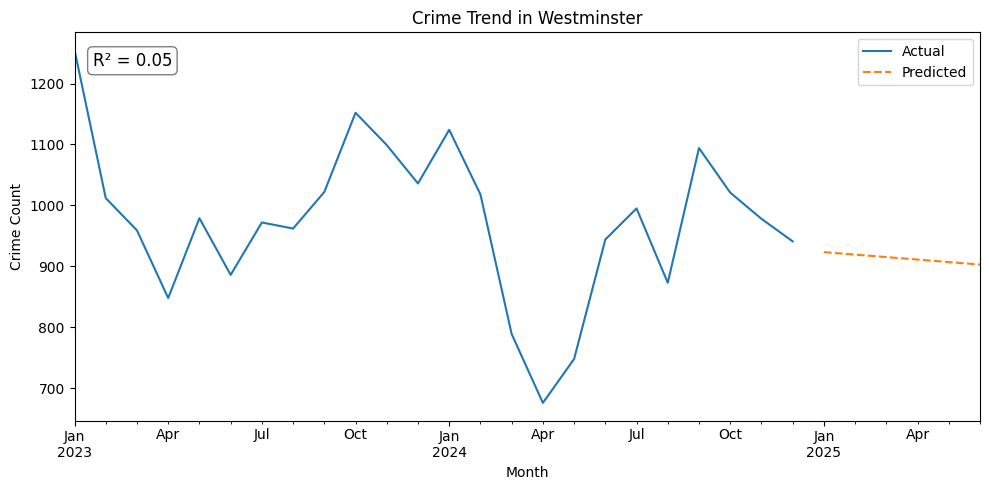

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Extend the date range to cover future months
all_dates = pd.date_range(
    start=monthly_crimes['Date'].min(),
    periods=len(monthly_crimes) + 6,
    freq='M'
)

# combine actual and predicted crime counts
all_crimes = pd.Series(
    list(monthly_crimes['CrimeCount']) + list(future_preds),
    index=all_dates
)

# predict values
y_pred = model.predict(X)

# calcurate R squared value
r2 =r2_score(y,y_pred)

# plot historical and future
plt.figure(figsize=(10, 5))
all_crimes[:len(monthly_crimes)].plot(label='Actual')
all_crimes[len(monthly_crimes):].plot(label='Predicted', linestyle='--')
plt.text(0.02, 0.95, f'R² = {r2:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))
plt.title('Crime Trend in Westminster')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend()
plt.tight_layout()
plt.show()

This model doesn't look right. I am creating a new model to make a better prediction.

#### Second try for creating regression model

I will use the following code that was created from the last model.

`df['Date']` = `pd.to_datetime(df['Date'])`\
`westminster_df` = `df[df['Borough']` == `'Westminster']`\
`monthly_crimes` = `westminster_df.resample('M', on='Date').size().reset_index(name='CrimeCount')`


Adding feature engineering for seasonality

In [15]:
# encode 'Month' as cyclical features using sine and cosine to capture seasonality
monthly_crimes['Month'] = monthly_crimes['Date'].dt.month
monthly_crimes['Month_sin'] = np.sin(2 * np.pi * monthly_crimes['Month'] / 12)
monthly_crimes['Month_cos'] = np.cos(2 * np.pi * monthly_crimes['Month'] / 12)

Build and fit the improved regression model\
 Create a polynomial regression model with Ridge regularisation. This allows to capture non-linear seasonal trends in the crime data

In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# input features with seasonal encoding
X_cyclical = monthly_crimes[['Month_sin', 'Month_cos']].values
model = LinearRegression()
model.fit(X_cyclical, y)

# crime count per month 
y = monthly_crimes['CrimeCount'].values

model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
model.fit(X, y)


,steps,"[('polynomialfeatures', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,alpha,1.0
,fit_intercept,True
,copy_X,True


Create future months and apply the same cyclical encoding

In [17]:
future_months = pd.date_range(monthly_crimes['Date'].max() + pd.offsets.MonthBegin(1), periods=6, freq='MS')
future_df = pd.DataFrame({
    'Date': future_months,
    'Month': future_months.month,
})
future_df['Month_sin'] = np.sin(2 * np.pi * future_df['Month'] / 12)
future_df['Month_cos'] = np.cos(2 * np.pi * future_df['Month'] / 12)

# create a new linear regression model from scikit-learn
model = LinearRegression()
model.fit(monthly_crimes[['Month_sin', 'Month_cos']], monthly_crimes['CrimeCount'])

# predict future crime counts using the trained model
X_future = future_df[['Month_sin', 'Month_cos']]
future_preds = model.predict(X_future)

# calculate R² for cyclical model
y_pred2 = model.predict(X_cyclical)
r2_cyclical = r2_score(y, y_pred2)


c:\Users\Kaori\projects\crime-data-analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Plot the results

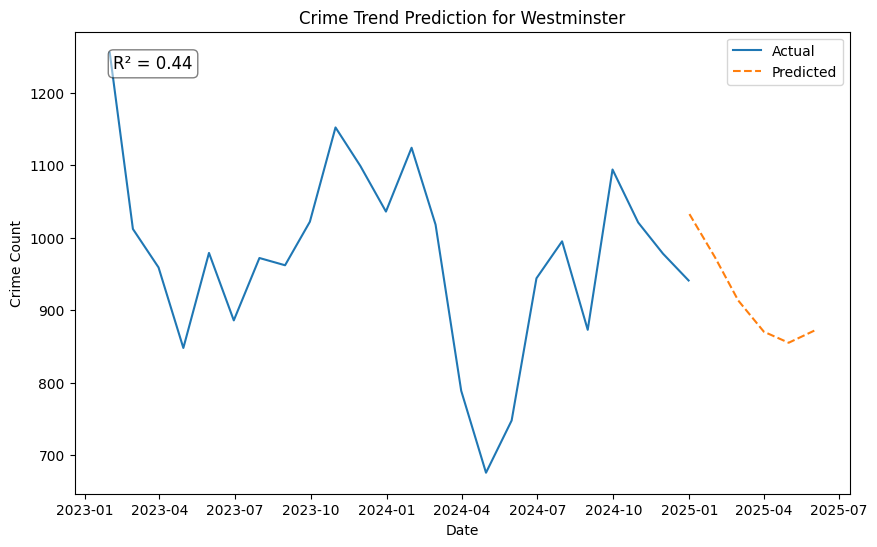

In [18]:
plt.figure(figsize=(10,6))
plt.plot(monthly_crimes['Date'], y, label='Actual')
plt.plot(future_df['Date'], future_preds, label='Predicted', linestyle='--')
plt.title("Crime Trend Prediction for Westminster")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.legend()
plt.text(0.05, 0.95, f'R² = {r2_cyclical:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))
plt.show()


The first model didn't include cyclical patterns (trends that repeat over time in a non-linear and non-fixed way) which led to poor perfomance. The second model adds adds features that make sense for monthly data, leading to improved predictive power.\
R² value also shows the improvements in prediction.

Go back to \
[README](https://github.com/Kaori61/crime-data-analysis/blob/main/README.md) / 
[ETL pipleline](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/etl_pipeline.ipynb) /
[Exploratory data analysis](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/exploratory_data_analysis.ipynb)